# Emotion Detector
## Done by Carmela Finianos
### EEN 588 - Machine Vision
#### Spring 2023

##### The aim of the project is to train a model using CNN to detect emotions in images. The dataset used is feras2013 found on this website https://www.kaggle.com/datasets/deadskull7/fer2013

In [1]:
# Import TensorFlow
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
import random
import seaborn as sns
import keras
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import warnings
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import regularizers
from keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.utils import load_img
from keras.utils.vis_utils import plot_model
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D,Activation,Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
warnings.simplefilter("ignore")
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.regularizers import l1, l2
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Preparing Data

Preparing the data before training a machine learning model is crucial to achieving accurate and reliable results. This is particularly important when working with image data, where the images need to be preprocessed and converted into a suitable format for the model to learn from. In this project, the pixel data of the images is first converted from strings to integers, which is necessary to perform mathematical operations on the data. The data is then reshaped so that it can be divided into training and testing datasets. The reshaped data is then inserted into a numpy array, which is a high-performance data structure that can efficiently handle large amounts of numerical data. Properly preparing the data in this way ensures that the model can effectively learn from the data and make accurate predictions.

In [4]:
# import pandas and read CSV file into a DataFrame
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fer2013.csv')

# extract pixels and emotion columns from the DataFrame
X = df.pixels
y = df.emotion

# get the number of rows in the DataFrame
count = len(X) - 1

# initialize variables for iterating through the DataFrame
p = 0
xs = [None] * count
Xs = []

# iterate through each row of the DataFrame
while p < count:
    # convert pixel values to a list of integers
    i = list(map(int, X[p].split(' ')))[:48 * 48]
    # reshape the list into a 48x48 array and convert to uint8 data type
    i = np.array(i).reshape((48, 48)).astype('uint8')
    # normalize the pixel values to be between 0 and 1 and add to Xs list
    xs[p] = i / 255
    Xs.append(xs[p])
    # increment p to move to the next row
    p = p + 1

# convert Xs list to a numpy array
Xs = np.array(Xs)

# initialize empty list for y values
ys = []
h = []
k = 0

# iterate through each row of the DataFrame
while k < count:
    # add the emotion value to the h list
    h.append(y[k])
    # add the h list to the ys list
    ys.append(h)
    # clear the h list for the next row
    h = []
    # increment k to move to the next row
    k = k + 1

# convert ys list to a numpy array
ys = np.array(ys)

## Splitting Data

Dividing the data into training and testing sets is an essential step in machine learning. In this project, we will be splitting our data into 80% training and 20% testing. This means that we will use 80% of our data to train the model and the remaining 20% will be used to evaluate its performance. The purpose of dividing the data in such a way is to avoid overfitting, which is a common problem in machine learning. Overfitting occurs when a model learns the training data too well, including its noise and outliers, resulting in poor performance on new, unseen data. By holding out a portion of the data for testing, we can measure how well our model generalizes to new data and adjust it accordingly. Therefore, splitting the data into training and testing is a critical step in ensuring the reliability and accuracy of our model.





In [5]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.2, random_state=0)

## Visualizing Training Images 

We will plot 25 images in the training set to ensure that the correct emotion is associated to the correct face image.

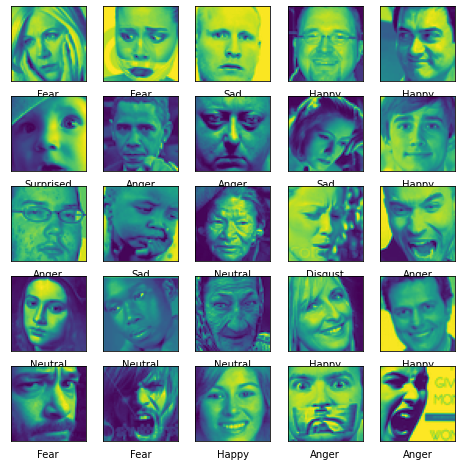

In [6]:
# create a list of class names for the facial expressions
class_names = ["Anger", "Disgust", "Fear", "Happy", "Sad","Surprised","Neutral"]

# create a new figure for plotting
plt.figure(figsize=(8,8))

# iterate through the first 25 images in the X_train dataset
for i in range(25):
    # create a new subplot in the figure
    plt.subplot(5,5,i+1)
    # remove tick marks on the x and y axes
    plt.xticks([])
    plt.yticks([])
    # turn off grid lines
    plt.grid(False)
    # display the current image in the subplot
    plt.imshow(X_train[i])
    # set the label for the current image using the corresponding y_train value
    plt.xlabel(class_names[y_train[i][0]])

# show the figure
plt.show()


## CNN Model

A Convolutional Neural Network (CNN) is a deep learning model that is widely used in computer vision tasks, such as image classification, object detection, and segmentation. A typical CNN consists of a series of convolutional layers that learn various image features, followed by pooling layers that reduce the dimensionality of the features, and then fully connected layers that classify the input images.

In our Emotion Detector project, we will be defining a CNN model to classify emotions in images. The first layer in our model is a Conv2D layer, which applies a 2D convolution operation on the input images to extract features. We will be using ReLU activation function to introduce non-linearity into the model. The next layer is a MaxPooling2D layer, which reduces the dimensionality of the features extracted by the Conv2D layer.

We will repeat the above layers to further extract important features from the input images. Then, we will flatten the output of the convolutional layers and pass it through a series of dense layers to classify the input image. The dense layers are fully connected layers that perform classification on the extracted features. We will be using the Softmax activation function in the final dense layer to output the probabilities of the input image belonging to each of the 7 emotion classes.

Overall, our CNN model will have multiple convolutional and pooling layers to extract important features from the input image, followed by fully connected dense layers to classify the input image. The output of the model will be a probability distribution over the 7 emotion classes.

In [7]:
def cnn_model():
  # Define a sequential model
  model= tf.keras.models.Sequential()
  
  # Add convolutional layers with activation function ReLU and input shape
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
  model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
  
  # Add a batch normalization layer
  model.add(BatchNormalization())
  
  # Add a max pooling layer with a 2x2 pool size and dropout layer
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Add more convolutional layers with batch normalization and dropout
  model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
      
  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
  model.add(BatchNormalization())
  model.add(MaxPool2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  # Flatten the output of the convolutional layers
  model.add(Flatten()) 
  
  # Add dense layers with activation function ReLU and batch normalization, and dropout
  model.add(Dense(256,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
      
  model.add(Dense(512,activation = 'relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  # Add output layer with activation function softmax and compile the model
  model.add(Dense(7, activation='softmax'))
  model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])
    
  # Return the compiled model
  return model

# Call the function to create the model and compile it again for good measure
model = cnn_model()
model.compile(
    optimizer = Adam(learning_rate=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       2

## Model Fitting

The Adam optimizer is widely used in deep learning models due to its effectiveness in adjusting the learning rate and other parameters during training. In this project, we have used the Adam optimizer to minimize the loss function and improve the accuracy of our model. To evaluate the performance of our model, we have used the accuracy metric, which calculates the percentage of correct predictions. By using accuracy as our metric, we aim to maximize the number of correctly classified images.

To ensure that our model learns the patterns in the data well, we have trained the model for 100 epochs. An epoch represents one complete cycle through the training dataset. With 100 epochs, we aim to allow the model enough time to learn the patterns in the data and generalize well to unseen images. By fitting our model with 100 epochs, we increase the chances of achieving high accuracy in our predictions.

In [10]:
#Convert the training and testing labels to NumPy arrays for further processing
y_train = np.array(y_train)
y_test = np.array(y_test)
# Compile the model with the Adam optimizer, sparse categorical cross-entropy loss, and accuracy metric
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# An epoch means training the neural network with all the
# training data for one cycle. Here I use 100 epochs
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
898/898 [==============================] - 42s 31ms/step - loss: 5.2931 - accuracy: 0.2100 - val_loss: 2.2818 - val_accuracy: 0.2712
Epoch 2/100
898/898 [==============================] - 27s 30ms/step - loss: 2.5233 - accuracy: 0.2668 - val_loss: 3.0127 - val_accuracy: 0.3176
Epoch 3/100
898/898 [==============================] - 27s 30ms/step - loss: 3.1026 - accuracy: 0.3901 - val_loss: 2.8735 - val_accuracy: 0.3568
Epoch 4/100
898/898 [==============================] - 27s 30ms/step - loss: 2.9159 - accuracy: 0.4289 - val_loss: 2.9028 - val_accuracy: 0.4135
Epoch 5/100
898/898 [==============================] - 26s 29ms/step - loss: 2.8471 - accuracy: 0.4495 - val_loss: 3.0934 - val_accuracy: 0.4276
Epoch 6/100
898/898 [==============================] - 26s 29ms/step - loss: 2.7132 - accuracy: 0.4692 - val_loss: 2.5120 - val_accuracy: 0.4951
Epoch 7/100
898/898 [==============================] - 27s 30ms/step - loss: 2.7048 - accuracy: 0.4732 - val_loss: 2.5441 - val_ac

## Predicted vs. Actual

In order to evaluate the accuracy of the emotion detector model, it is useful to visualize some of the images along with their predicted and actual emotions. This can be achieved by plotting a selection of images from the test dataset and their predicted and actual emotion labels. To indicate the accuracy of the model, the predicted emotion label will be displayed in green if it matches the actual emotion label, and red if it does not. This approach provides a quick and intuitive way to assess the performance of the model, as it allows us to easily identify any inaccuracies or areas for improvement

225/225 [==============================] - 2s 7ms/step


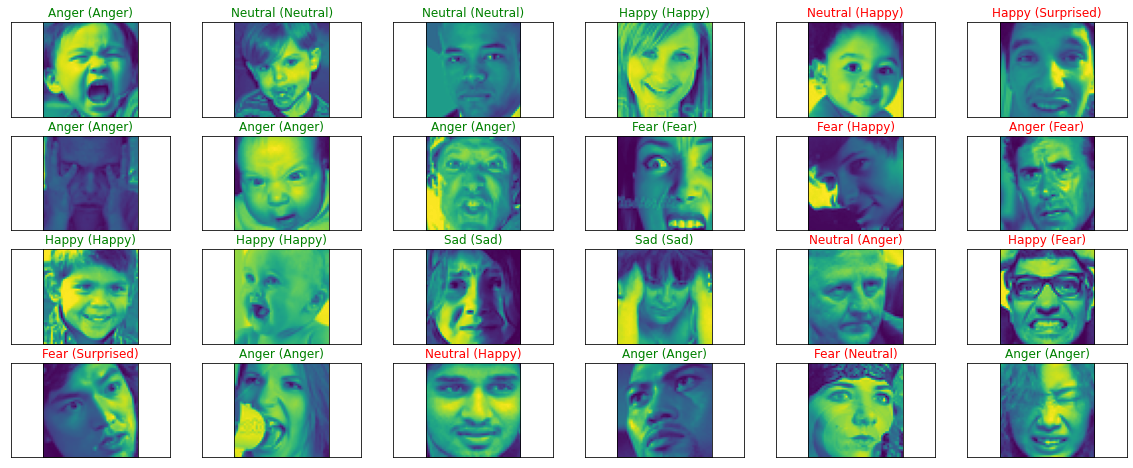

In [11]:
#Predict the labels of the test set using the trained model
preds = model.predict(X_test)

#Convert the predicted probabilities into class labels by selecting the label with the highest probability
y_pred = np.argmax(preds , axis = 1 )

#Define the list of class names for visualization
class_names = ["Anger", "Disgust", "Fear", "Happy", "Sad","Surprised","Neutral"]

#Create a figure to display a random sample of 24 images from the test set with their predicted and true labels
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=24, replace=False)):
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    # Add a subplot for each image
    ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
    # Display the image
    ax.imshow(np.squeeze(X_test[index]))
    # Get the predicted label for the image
    predict_index = class_names[y_pred[index]]
    # Get the true label for the image
    true_index =class_names[y_test[index][0]]
    # Set the title of the subplot to show the predicted and true labels, with the predicted label in green if correct and red if incorrect
    ax.set_title("{} ({})".format((predict_index), true_index), color=("green" if predict_index == true_index else "red"))

## Loss Plot

The validation loss vs training loss plot is an important tool for evaluating the performance of a machine learning model. This plot shows the training loss and validation loss over the course of the training process. The training loss represents the error on the training set during each epoch of the model training, while the validation loss represents the error on the validation set during each epoch.

Ideally, the training loss should decrease over time, indicating that the model is learning to fit the training data better. However, if the model is overfitting to the training data, the validation loss may start to increase while the training loss continues to decrease. This indicates that the model is not generalizing well to new data and may perform poorly on unseen data.

Therefore, we want to see both the training and validation loss decreasing over time, with the validation loss closely tracking the training loss. A large gap between the two losses indicates that the model is not generalizing well to new data. By monitoring this plot, we can adjust the model architecture or the hyperparameters to ensure that the model is not overfitting and is performing well on new data.


Text(0, 0.5, 'Loss')

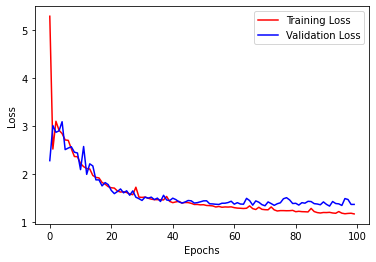

In [12]:
plt.plot(history.history["loss"],'r', label="Training Loss")
plt.plot(history.history["val_loss"],'b', label="Validation Loss")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

## Accuracy plot

The validation accuracy vs training accuracy plot is a visualization of how the accuracy of the model changes over the course of training. The training accuracy measures the accuracy of the model during training, while the validation accuracy measures the accuracy of the model on a validation dataset that was not seen during training. This plot can help identify if the model is overfitting or underfitting.

If the training accuracy is high but the validation accuracy is low, it indicates that the model is overfitting the training data and is not generalizing well to new data. In this case, the model may be too complex, and regularization techniques such as dropout or weight decay can be used to reduce overfitting.

On the other hand, if both training and validation accuracy are low, it may indicate that the model is underfitting and is not learning enough from the training data. This can be addressed by increasing the complexity of the model or by increasing the number of training epochs.

Ideally, the training and validation accuracy should be similar and increasing in tandem. This indicates that the model is learning the patterns in the training data and is generalizing well to new data. However, it is important to note that a high accuracy on the training and validation data does not necessarily mean that the model will perform well on new, unseen data.

Text(0, 0.5, 'Accuracy')

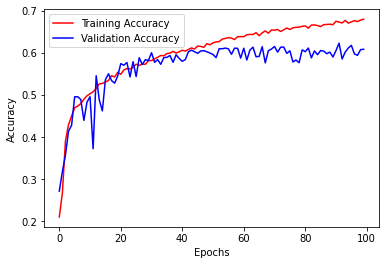

In [13]:
plt.plot(history.history["accuracy"],'r',label="Training Accuracy")
plt.plot(history.history["val_accuracy"],'b',label="Validation Accuracy")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

## Confusion Matrix

The confusion matrix is a helpful tool in evaluating the performance of a model by displaying the number of correct and incorrect predictions for each class. In this project, we use a confusion matrix to evaluate the performance of our emotion detection model. The matrix displays the actual and predicted emotion labels for each image. By looking at the confusion matrix, we can see that the model's accuracy for identifying Happy emotion is the highest among all emotions, while Disgust has the lowest accuracy. It is essential to analyze the confusion matrix to identify the classes that the model is having difficulty predicting, and to improve the model's performance for those specific classes.

225/225 [==============================] - 1s 6ms/step


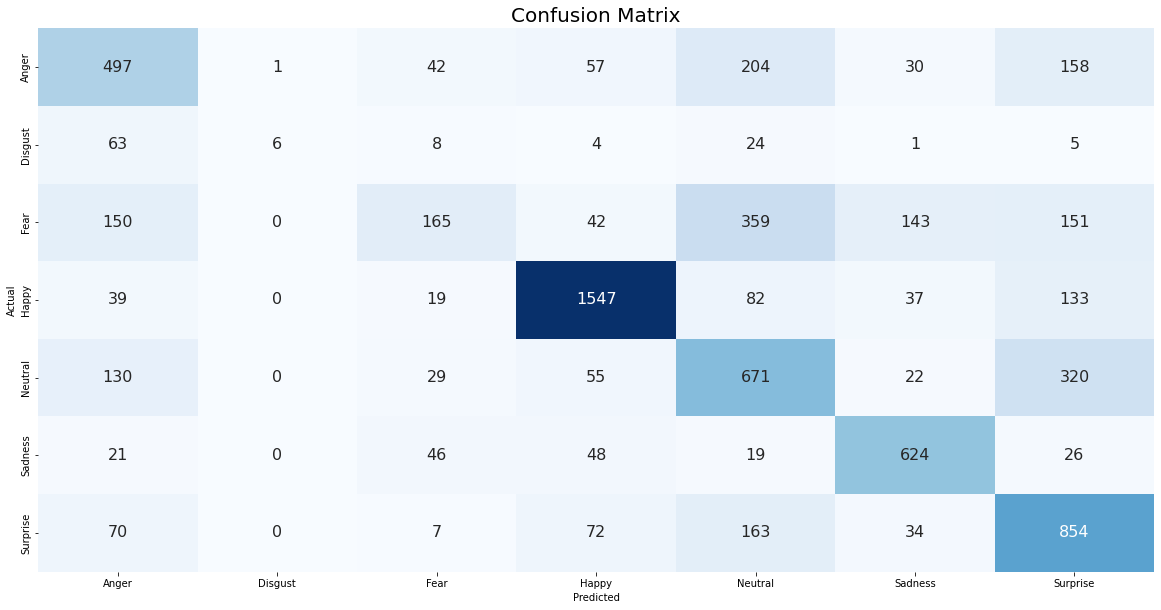

In [14]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
from sklearn.tree import DecisionTreeClassifier

#Get the predicted labels using the trained model
preds = model.predict(X_test)
y_pred = np.argmax(preds , axis = 1 )

#Reshape the predicted labels to match the shape of y_test
k=0
h=[]
yp=[]
while k<len(y_pred):
    h.append(y_pred[k])
    #print(h)
    yp.append(h)
    #print (ys)
    h=[]
    k=k+1
y_pred=np.array(yp)

#Define the class labels
CLASS_LABELS  = ['Anger', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sadness', "Surprise"]

#Calculate the confusion matrix
cm_data = confusion_matrix(y_test, y_pred)
cm = pd.DataFrame(cm_data, columns=CLASS_LABELS, index = CLASS_LABELS)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'

#Plot the confusion matrix using seaborn heatmap
plt.figure(figsize = (20,10))
plt.title('Confusion Matrix', fontsize = 20)
sns.set(font_scale=1.2)
ax = sns.heatmap(cm, cbar=False, cmap="Blues", annot=True, annot_kws={"size": 16}, fmt='g')


## Conclusion

In conclusion, this project aimed to train a CNN model to detect emotions in images with the help of TensorFlow and Keras. Although the model achieved a high level of accuracy, the results were slightly less accurate than expected. One possible reason for this could be that the model was trained with fewer images compared to other similar projects. Another factor that contributed to this was the amount of time taken to run the epochs. The least accurately predicted emotion was disgust, which could be due to the fact that it was the least present emotion in the data set. On the other hand, the most accurately predicted emotion was happiness, which was the most present emotion in the data set. Overall, this project has successfully demonstrated the use of CNN in emotion detection and provides a foundation for further exploration in this field.